In [1]:
import pandas as pd # Lodad the pandas library
from pytrends.request import TrendReq # Load PyTrends library for accessing Google Trends
#https://github.com/GeneralMills/pytrends 
#%matplotlib inline

In [ ]:
#pip install pytrends
#import warnings


In [225]:
#### Google Finance related Categories
cat_type={'Finance': 7,  #1
'Accounting & Auditing': 278, #1.1
'Accounting & Financial Software': 1341,
'Tax Preparation & Planning': 1283,
'Banking': 37, #1.2
'Credit & Lending': 279, #1.3
'Auto Financing': 468,
'College Financing': 813,
'Credit Cards': 811,
'Debt Management': 812,
'Home Financing': 466,
'Currencies & Foreign Exchange': 814, #1.4
'Financial Planning': 903, #1.5
'Grants & Financial Assistance': 1282, #1.6
'College Financing': 813, 
'Insurance': 38, #1.7
'Auto Insurance': 467,
'Health Insurance': 249,
'Home Insurance': 465,
'Investing': 107, #1.8
'Commodities & Futures Trading': 904,
'Retirement & Pension': 619} #1.9
cat_type

{'Finance': 7,
 'Accounting & Auditing': 278,
 'Accounting & Financial Software': 1341,
 'Tax Preparation & Planning': 1283,
 'Banking': 37,
 'Credit & Lending': 279,
 'Auto Financing': 468,
 'College Financing': 813,
 'Credit Cards': 811,
 'Debt Management': 812,
 'Home Financing': 466,
 'Currencies & Foreign Exchange': 814,
 'Financial Planning': 903,
 'Grants & Financial Assistance': 1282,
 'Insurance': 38,
 'Auto Insurance': 467,
 'Health Insurance': 249,
 'Home Insurance': 465,
 'Investing': 107,
 'Commodities & Futures Trading': 904,
 'Retirement & Pension': 619}

Finance
Accounting & Auditing
Accounting & Financial Software


In [239]:
trends_cat_wise=pd.DataFrame()
region_cat_wise=pd.DataFrame()
for i in [i for i in cat_type][:3]:
    pytrends = TrendReq(hl='en-GB', 
                    tz=360, #timezone
                    timeout=(10,25),#time out after afew seconts
                    retries=2, #retries 2 times
                    backoff_factor=0.1) #stops after a few attempts
    #Create a list with 5 keywords you'd like to investigate
    kw_list=['KOTAK MAHINDRA','HDFC BANK','AU BANK','IDFC FIRST BANK','AXIS BANK']
    pytrends.build_payload(kw_list, #keywords to lookup
                       cat=cat_type[i],#ory to look in
                       timeframe='today 5-y', #timeframe
                       geo='IN',
                       gprop='')#region
    #Convert the trends data to a Pandas DataFrame.
    trends_data = pytrends.interest_over_time()
    #print(trends_data.plot(title=str(i)))
    trends_data['Category']=i
    trends_cat_wise=trends_cat_wise.append(trends_data)
    region=pytrends.interest_by_region(resolution='IN', inc_low_vol=True, inc_geo_code=False)
    region['Category']=i
    region_cat_wise=region_cat_wise.append(region)

<ipython-input-239-6e0060542622>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trends_cat_wise=trends_cat_wise.append(trends_data)
<ipython-input-239-6e0060542622>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region_cat_wise=region_cat_wise.append(region)
<ipython-input-239-6e0060542622>:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  trends_cat_wise=trends_cat_wise.append(trends_data)
<ipython-input-239-6e0060542622>:23: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  region_cat_wise=region_cat_wise.append(region)
<ipython-input-239-6e0060542622>:20: FutureWarning: The frame.append method is deprecated and will be removed from

In [240]:
region_cat_wise

,KOTAK MAHINDRA,HDFC BANK,AU BANK,IDFC FIRST BANK,AXIS BANK,Category
geoName,,,,,,
Andaman and Nicobar Islands,0,43,0,0,57,Finance
Andhra Pradesh,11,35,0,4,50,Finance
Arunachal Pradesh,0,41,0,0,59,Finance
Assam,5,41,0,3,51,Finance
Bihar,12,37,0,3,48,Finance
...,...,...,...,...,...,...
Telangana,0,0,0,0,0,Accounting & Financial Software
Tripura,100,0,0,0,0,Accounting & Financial Software
Uttar Pradesh,0,0,0,0,100,Accounting & Financial Software


In [2]:
#Lets create a variable that stores the API settings
pytrends = TrendReq(hl='en-GB', 
                    tz=360, #timezone
                    timeout=(10,25),#time out after afew seconts
                    retries=2, #retries 2 times
                    backoff_factor=0.1) #stops after a few attempts

In [204]:
#Create a list with 5 keywords you'd like to investigate
#kw_list = ["seo audit", "aso audit", "app marketing agency","seo agency", "aso agency"]
kw_list=['KOTAK MAHINDRA','HDFC BANK','AU BANK','IDFC FIRST BANK','AXIS BANK']
#It's possible to change the category, locations, regions. You can find your category here https://github.com/pat310/google-trends-api/wiki/Google-Trends-Categories

In [272]:
#Pass your variables over to Google Trends
pytrends.build_payload(kw_list, #keywords to lookup
                       cat=7,#ory to look in
                       timeframe='today 12-m',                
                       geo='IN',
                       gprop='')#region

In [273]:
#Convert the trends data to a Pandas DataFrame.
trends_data = pytrends.interest_over_time()

<AxesSubplot:xlabel='date'>

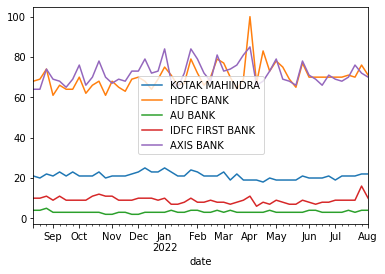

In [274]:
trends_data.plot()

In [275]:
trends_data

,KOTAK MAHINDRA,HDFC BANK,AU BANK,IDFC FIRST BANK,AXIS BANK,isPartial
date,,,,,,
2021-08-15,21,68,4,10,64,False
2021-08-22,20,69,4,10,64,False
2021-08-29,22,74,5,11,74,False
2021-09-05,21,61,3,9,69,False
2021-09-12,23,66,3,11,68,False
2021-09-19,21,64,3,9,65,False
2021-09-26,23,64,3,9,69,False
2021-10-03,21,70,3,9,76,False
2021-10-10,21,62,3,9,66,False


In [247]:
trends_data

,KOTAK MAHINDRA,HDFC BANK,AU BANK,IDFC FIRST BANK,AXIS BANK,isPartial
date,,,,,,
2022-05-14,19,56,3,5,57,False
2022-05-15,12,39,2,3,39,False
2022-05-16,22,86,4,10,77,False
2022-05-17,23,85,4,10,84,False
2022-05-18,23,85,4,9,77,False
...,...,...,...,...,...,...
2022-08-06,23,74,4,7,74,False
2022-08-07,17,47,2,6,45,False
2022-08-08,26,91,5,15,92,False


In [276]:
pytrends.interest_by_region(resolution='IN', inc_low_vol=True, inc_geo_code=False)

,KOTAK MAHINDRA,HDFC BANK,AU BANK,IDFC FIRST BANK,AXIS BANK
geoName,,,,,
Andaman and Nicobar Islands,0,46,0,0,54
Andhra Pradesh,12,36,0,5,47
Arunachal Pradesh,0,42,0,0,58
Assam,7,40,0,5,48
Bihar,15,35,1,4,45
Chandigarh,12,45,2,5,36
Chhattisgarh,10,37,2,8,43
Dadra and Nagar Haveli,11,53,0,1,35
Daman and Diu,8,50,0,4,38


In [216]:
trends_data.tail(5)

,KOTAK MAHINDRA,HDFC BANK,AU BANK,IDFC FIRST BANK,AXIS BANK,isPartial
date,,,,,,
2022-07-10,15,53,2,7,51,False
2022-07-17,16,54,3,7,52,False
2022-07-24,16,52,2,7,57,False
2022-07-31,16,57,3,12,54,False
2022-08-07,16,49,3,8,50,True


In [217]:
#trends_data[trend_data.index>"2021-01-01"].sum(axis=0)
trends_data[trends_data.index>"2020-01-01"].sum(axis=0)
trends_data.sum(axis=0)

KOTAK MAHINDRA      3811
HDFC BANK          14116
AU BANK              391
IDFC FIRST BANK     1084
AXIS BANK          15780
isPartial              1
dtype: int64

<AxesSubplot:xlabel='date'>

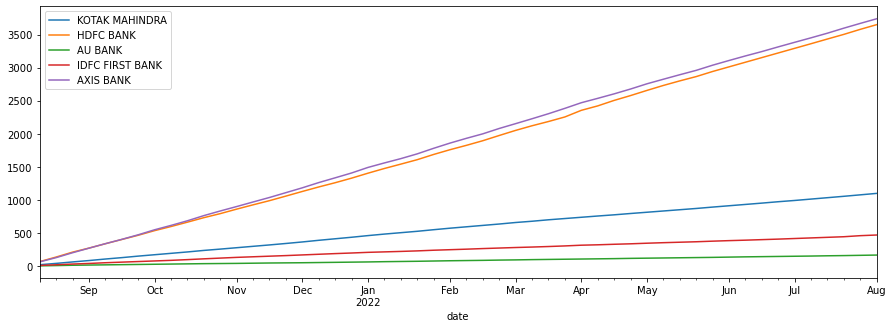

In [277]:
trends_data.drop('isPartial',axis=1).cumsum().plot(figsize=(15,5))

In [98]:
pytrend=TrendReq()
pytrend.build_payload(kw_list=['HDFC'])

In [113]:
related_queries = pytrend.related_queries()
related_queries.values()

dict_values([{'top':                      query  value
0          netbanking hdfc    100
1                hdfc bank     51
2             hdfc banking     47
3         hdfc net banking     41
4              net banking     41
5                 hdfc net     41
6               hdfc login     29
7              credit card     23
8         hdfc credit card     23
9               hdfc share     14
10        hdfc share price     13
11               hdfc loan     10
12                     sbi     10
13             hdfc online     10
14   hdfc netbanking login      9
15         hdfc bank share      9
16         hdfc card login      9
17      hdfc customer care      8
18  hdfc credit card login      8
19   hdfc bank share price      8
20    hdfc bank netbanking      7
21                   icici      7
22               hdfc life      7
23          hdfc ifsc code      6
24  hdfc net banking login      4, 'rising':                                     query  value
0                    hdfc amc share

In [133]:
keywords = TrendReq(geo='IN').suggestions(keyword='Best Footballer')
df = pd.DataFrame(keywords)
df.drop(columns= 'mid')

,title,type
0,George Best,Northern Irish footballer
1,George Best Belfast City Airport,"Airport in Belfast, Northern Ireland"
2,Calum Best,American TV personality
3,UEFA Men's Player of the Year Award,Award
4,African Player of the Year,Award


In [ ]:
from __future__ import print_function
import pytrends 
from pytrends.request import TrendReq
import pandas as pd
import time
import datetime
from datetime import datetime, date, time
from googleapiclient.discovery import build
from google.cloud import bigquery
from google.oauth2 import service_account
from pandas.io.json import json_normalize  

### Documentation ###

# https://searchengineland.com/learn-how-to-chart-and-track-google-trends-in-data-studio-using-python-329119
# https://pypi.org/project/pytrends/
# https://support.google.com/trends/answer/4365533?hl=en

### 1. Authentication ###

credentials = service_account.Credentials.from_service_account_file('{INSERT SERVICE ACCOUNT JSON FILE}') # file path where .json is located

client = bigquery.Client(credentials=credentials,project=credentials.project_id)

# If modifying these scopes, delete the file token.pickle.
SCOPES = ['https://www.googleapis.com/auth/spreadsheets.readonly']

pytrend = TrendReq() 


### 2. Specify Google Sheet that outlines Google Trends request details ###

def grab_terms(SPREADSHEET_ID, RANGE_NAME):
    creds= service_account.Credentials.from_service_account_file('{INSERT SERVICE ACCOUNT JSON FILE}') # file path where .json is located

    service = build('sheets', 'v4', credentials=creds)

    #Call the Sheets API
    sheet = service.spreadsheets()
    result = sheet.values().get(spreadsheetId=SPREADSHEET_ID,range=RANGE_NAME).execute()
    values = result.get('values')
    del values[0]
	#print(values) # Print this to understand data received
	
	return values



### 3. Grab Interest Over Time data for each term ###

def interest_over_time():

	data = []
	
	searches = grab_terms('{INSERT GOOGLE SHEETS SPREADSHEET_ID}', '{INSERT GOOGLE SHEETS RANGE_NAME}') # Read the Google Sheet that outlines Google Trends request details

	for trending in searches:
		keyword = '\''+trending[1]+'\'' # Term that you would like to report
		timeframe = trending[3] # Date range to report on
		geo = trending[2] # location to report on

		pytrend.build_payload([keyword], timeframe = timeframe, geo = geo) #builds request
		iot = pytrend.interest_over_time()
		iot.reset_index(level=0, inplace=True)

		parse = iot.values.tolist() # Print this to understand data received

		for x in parse:
			data.append([ 
				x[0], 
				trending[0],
				trending[1],
				x[1]
				])
	df = pd.DataFrame(data, columns= ['date', 'theme', 'keyword', 'value'])

	df.to_gbq(
			'{ADD DATASET_NAME}.t_googletrends_interestovertime', #dataset name.table name
			'{ADD PROJECT_ID}', #project id
			chunksize=10000,
			reauth=False,
			if_exists='replace', #change to 'append' if you want existing table to remain and new data append to bottom
			credentials=credentials
			)
	print('Interst over time data uploaded to GBQ')


### 4. Grab Related Queries data for each term ###

def related_queries():

	top = []
	rising = []


	searches = grab_terms('{INSERT GOOGLE SHEETS SPREADSHEET_ID}', '{INSERT GOOGLE SHEETS RANGE_NAME}') # Read the Google Sheet that outlines Google Trends request details

	for trending in searches:
		keyword = '\''+trending[1]+'\'' # Term that you would like to report
		timeframe = trending[3]  # Date range to report on
		geo = trending[2] # location to report on

		pytrend.build_payload([keyword], timeframe = timeframe, geo = geo) #builds request
		related_queries_dict = pytrend.related_queries()
		#print(related_queries_dict[trending[1]]) # Print this to understand data received
		
		if related_queries_dict[trending[1]]['top'] is not None:
			for x in related_queries_dict[trending[1]]['top'][['query'][0]]:
				top.append([
					trending[0],
					trending[1],
					x
					])
		if related_queries_dict[trending[1]]['rising'] is not None:
			for x in related_queries_dict[trending[1]]['rising'][['query'][0]]:
				rising.append([
					trending[0],
					trending[1],
					x
					])

	df_rising = pd.DataFrame(rising, columns= ['theme', 'keyword', 'rising_keyword'])

	df_rising.to_gbq(
			'{ADD DATASET_NAME}.t_googletrends_related_rising', #dataset name.table name
			'{ADD PROJECT_ID}', #project id
			chunksize=10000,
			reauth=False,
			if_exists='replace', #change to 'append' if you want existing table to remain and new data added to bottom
			credentials=credentials
			)
	print('Related rising keywords uploaded to GBQ')

	df_top = pd.DataFrame(top, columns= ['theme', 'keyword', 'top_keyword'])
	
	df_top.to_gbq(
		'{ADD DATASET_NAME}.t_googletrends_related_top', #dataset name.table name
		'{ADD PROJECT_ID}', #project id
		chunksize=10000,
        reauth=False,
		if_exists='replace', #change to 'append' if you want existing table to remain and new data added to bottom
		credentials=credentials
		)
	print('Related top keywords uploaded to GBQ')
	


interest_over_time()
related_queries()